In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cgen = pd.read_csv("C:/Users/sriha/Downloads/archive (6)/Country Wise Gender.csv")
cyv = pd.read_csv("C:/Users/sriha/Downloads/archive (6)/Country Wise Yearly VIsitors.csv")

In [3]:
cgen.head(5)

,Country of Nationality,2014 Male,2014 Female,2015 Male,2015 Female,2016 Male,2016 Female,2017 Male,2017 Female,2018 Male,2018 Female,2019 Male,2019 Female,2020 Male,2020 Female
0,Canada,53.7,46.3,53.8,46.2,53.4,46.6,53.0,47.0,53.1,46.9,53.1,46.9,53.23,46.77
1,United States Of America,55.9,44.1,55.5,44.5,55.1,44.9,54.8,45.2,54.8,45.2,54.7,45.3,55.13,44.87
2,Argentina,46.2,53.8,47.2,52.8,45.7,54.3,43.2,56.8,42.6,57.4,44.8,55.2,38.91,61.09
3,Brazil,53.7,46.3,54.3,45.7,54.1,45.9,52.9,47.1,51.7,48.3,53.9,46.1,49.86,50.14
4,Mexico,50.8,49.2,51.9,48.1,50.8,49.2,48.8,51.2,47.8,52.2,48.7,51.3,47.86,52.14


In [5]:
cgen = cgen.fillna(0)

In [6]:
cgen.isnull().sum()

Country of Nationality    0
2014 Male                 0
2014 Female               0
2015 Male                 0
2015 Female               0
2016 Male                 0
2016 Female               0
2017 Male                 0
2017 Female               0
2018 Male                 0
2018 Female               0
2019 Male                 0
2019 Female               0
2020 Male                 0
2020 Female               0
dtype: int64

In [7]:
cgen.rename(columns = {'Country of Nationality':'Country'},inplace = True)

In [8]:
cgen_updated = pd.merge(cyv, cgen, on='Country', how='inner')

In [9]:
cgen_updated.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2014 Male,2014 Female,...,2016 Male,2016 Female,2017 Male,2017 Female,2018 Male,2018 Female,2019 Male,2019 Female,2020 Male,2020 Female
0,Canada,268485,281306,317239,335439,351040,351859,122868,53.7,46.3,...,53.4,46.6,53.0,47.0,53.1,46.9,53.1,46.9,53.23,46.77
1,Argentina,9731,9351,12308,14875,16345,12844,4294,46.2,53.8,...,45.7,54.3,43.2,56.8,42.6,57.4,44.8,55.2,38.91,61.09
2,Brazil,19563,20610,21289,24453,26579,25422,8092,53.7,46.3,...,54.1,45.9,52.9,47.1,51.7,48.3,53.9,46.1,49.86,50.14
3,Mexico,13978,14049,15689,18114,19909,20766,4580,50.8,49.2,...,50.8,49.2,48.8,51.2,47.8,52.2,48.7,51.3,47.86,52.14
4,Austria,34360,33670,33089,31832,33200,32332,9182,57.2,42.8,...,58.2,41.8,58.1,41.9,58.2,41.8,57.1,42.9,55.48,44.52


In [10]:
cgen_updated.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2014 Male,2014 Female,...,2016 Male,2016 Female,2017 Male,2017 Female,2018 Male,2018 Female,2019 Male,2019 Female,2020 Male,2020 Female
0,Canada,268485,281306,317239,335439,351040,351859,122868,53.7,46.3,...,53.4,46.6,53.0,47.0,53.1,46.9,53.1,46.9,53.23,46.77
1,Argentina,9731,9351,12308,14875,16345,12844,4294,46.2,53.8,...,45.7,54.3,43.2,56.8,42.6,57.4,44.8,55.2,38.91,61.09
2,Brazil,19563,20610,21289,24453,26579,25422,8092,53.7,46.3,...,54.1,45.9,52.9,47.1,51.7,48.3,53.9,46.1,49.86,50.14
3,Mexico,13978,14049,15689,18114,19909,20766,4580,50.8,49.2,...,50.8,49.2,48.8,51.2,47.8,52.2,48.7,51.3,47.86,52.14
4,Austria,34360,33670,33089,31832,33200,32332,9182,57.2,42.8,...,58.2,41.8,58.1,41.9,58.2,41.8,57.1,42.9,55.48,44.52


In [11]:
cgen_new = cgen_updated.copy()

In [12]:
years = [str(year) for year in range(2014, 2021)]
male_columns = [f"{year} Male" for year in years]
female_columns = [f"{year} Female" for year in years]

# Calculate actual male and female visitors for each year
for year in years:
    cgen_new[f"{year} Male Visitors"] = (
        cgen_new[year] * cgen_new[f"{year} Male"] / 100
    ).round(0)
    cgen_new[f"{year} Female Visitors"] = (
        cgen_new[year] * cgen_new[f"{year} Female"] / 100
    ).round(0)
    output_columns = ['Country'] + \
                 [col for year in years for col in (f"{year} Male Visitors", f"{year} Female Visitors")]
result_data = cgen_new[['Country'] + output_columns[1:]]

In [13]:
cgen_new.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2014 Male,2014 Female,...,2016 Male Visitors,2016 Female Visitors,2017 Male Visitors,2017 Female Visitors,2018 Male Visitors,2018 Female Visitors,2019 Male Visitors,2019 Female Visitors,2020 Male Visitors,2020 Female Visitors
0,Canada,268485,281306,317239,335439,351040,351859,122868,53.7,46.3,...,169406.0,147833.0,177783.0,157656.0,186402.0,164638.0,186837.0,165022.0,65403.0,57465.0
1,Argentina,9731,9351,12308,14875,16345,12844,4294,46.2,53.8,...,5625.0,6683.0,6426.0,8449.0,6963.0,9382.0,5754.0,7090.0,1671.0,2623.0
2,Brazil,19563,20610,21289,24453,26579,25422,8092,53.7,46.3,...,11517.0,9772.0,12936.0,11517.0,13741.0,12838.0,13702.0,11720.0,4035.0,4057.0
3,Mexico,13978,14049,15689,18114,19909,20766,4580,50.8,49.2,...,7970.0,7719.0,8840.0,9274.0,9517.0,10392.0,10113.0,10653.0,2192.0,2388.0
4,Austria,34360,33670,33089,31832,33200,32332,9182,57.2,42.8,...,19258.0,13831.0,18494.0,13338.0,19322.0,13878.0,18462.0,13870.0,5094.0,4088.0


In [14]:
cgen_new.columns

Index(['Country', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2014 Male', '2014 Female', '2015 Male', '2015 Female', '2016 Male',
       '2016 Female', '2017 Male', '2017 Female', '2018 Male', '2018 Female',
       '2019 Male', '2019 Female', '2020 Male', '2020 Female',
       '2014 Male Visitors', '2014 Female Visitors', '2015 Male Visitors',
       '2015 Female Visitors', '2016 Male Visitors', '2016 Female Visitors',
       '2017 Male Visitors', '2017 Female Visitors', '2018 Male Visitors',
       '2018 Female Visitors', '2019 Male Visitors', '2019 Female Visitors',
       '2020 Male Visitors', '2020 Female Visitors'],
      dtype='object')

In [13]:
cgen_new.drop(['2014 Male', '2014 Female','2015 Male', '2015 Female', '2016 Male','2016 Female', '2017 Male', '2017 Female', '2018 Male', '2018 Female','2019 Male'],axis=1,inplace = True)

In [14]:
cgen_new.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2014 Male,2014 Female,...,2016 Male Visitors,2016 Female Visitors,2017 Male Visitors,2017 Female Visitors,2018 Male Visitors,2018 Female Visitors,2019 Male Visitors,2019 Female Visitors,2020 Male Visitors,2020 Female Visitors
0,Canada,268485,281306,317239,335439,351040,351859,122868,53.7,46.3,...,169406.0,147833.0,177783.0,157656.0,186402.0,164638.0,186837.0,165022.0,65403.0,57465.0
1,Argentina,9731,9351,12308,14875,16345,12844,4294,46.2,53.8,...,5625.0,6683.0,6426.0,8449.0,6963.0,9382.0,5754.0,7090.0,1671.0,2623.0
2,Brazil,19563,20610,21289,24453,26579,25422,8092,53.7,46.3,...,11517.0,9772.0,12936.0,11517.0,13741.0,12838.0,13702.0,11720.0,4035.0,4057.0
3,Mexico,13978,14049,15689,18114,19909,20766,4580,50.8,49.2,...,7970.0,7719.0,8840.0,9274.0,9517.0,10392.0,10113.0,10653.0,2192.0,2388.0
4,Austria,34360,33670,33089,31832,33200,32332,9182,57.2,42.8,...,19258.0,13831.0,18494.0,13338.0,19322.0,13878.0,18462.0,13870.0,5094.0,4088.0


In [18]:
cgen_new.columns
cgen_final.to_csv('Excel.csv', index = False)

In [13]:
cgen_final = cgen_new.copy()

In [22]:
cgen_final.drop(['2014','2015','2016','2017','2018','2019','2020'],axis = 1,inplace = True)

In [14]:
cgen_final.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2014 Male,2014 Female,...,2016 Male Visitors,2016 Female Visitors,2017 Male Visitors,2017 Female Visitors,2018 Male Visitors,2018 Female Visitors,2019 Male Visitors,2019 Female Visitors,2020 Male Visitors,2020 Female Visitors
0,Canada,268485,281306,317239,335439,351040,351859,122868,53.7,46.3,...,169406.0,147833.0,177783.0,157656.0,186402.0,164638.0,186837.0,165022.0,65403.0,57465.0
1,Argentina,9731,9351,12308,14875,16345,12844,4294,46.2,53.8,...,5625.0,6683.0,6426.0,8449.0,6963.0,9382.0,5754.0,7090.0,1671.0,2623.0
2,Brazil,19563,20610,21289,24453,26579,25422,8092,53.7,46.3,...,11517.0,9772.0,12936.0,11517.0,13741.0,12838.0,13702.0,11720.0,4035.0,4057.0
3,Mexico,13978,14049,15689,18114,19909,20766,4580,50.8,49.2,...,7970.0,7719.0,8840.0,9274.0,9517.0,10392.0,10113.0,10653.0,2192.0,2388.0
4,Austria,34360,33670,33089,31832,33200,32332,9182,57.2,42.8,...,19258.0,13831.0,18494.0,13338.0,19322.0,13878.0,18462.0,13870.0,5094.0,4088.0


In [24]:
cgen_final.to_csv('CountryWiseGender.csv', index = False)

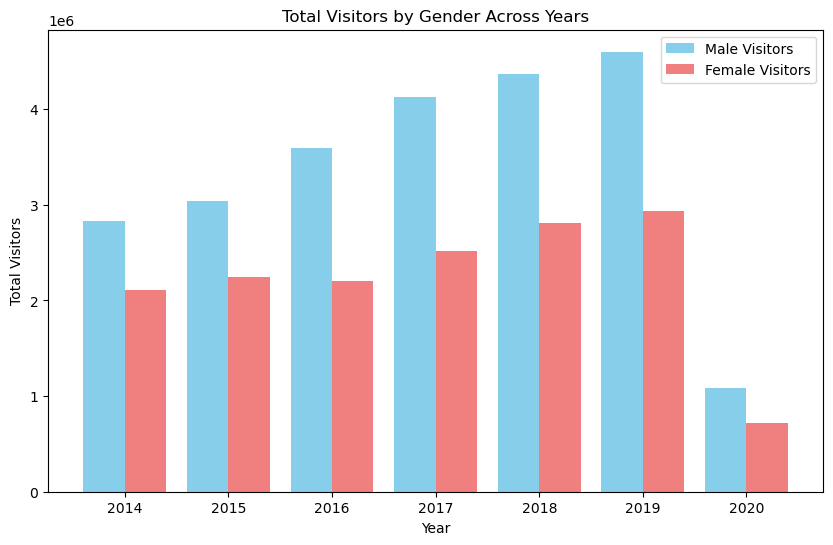

In [30]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
male_columns = [f'{year} Male Visitors' for year in years]
female_columns = [f'{year} Female Visitors' for year in years]

total_male_visitors = cgen_final[male_columns].sum()
total_female_visitors = cgen_final[female_columns].sum()

# Bar plot for total visitors by gender across years
plt.figure(figsize=(10, 6))
x = range(len(years))
plt.bar(x, total_male_visitors, width=0.4, label='Male Visitors', color='skyblue', align='center')
plt.bar([i + 0.4 for i in x], total_female_visitors, width=0.4, label='Female Visitors', color='lightcoral', align='center')
plt.xticks([i + 0.2 for i in x], years)
plt.xlabel('Year')
plt.ylabel('Total Visitors')
plt.title('Total Visitors by Gender Across Years')
plt.legend()
plt.savefig('total_visitors_by_gender.png') 
plt.show()


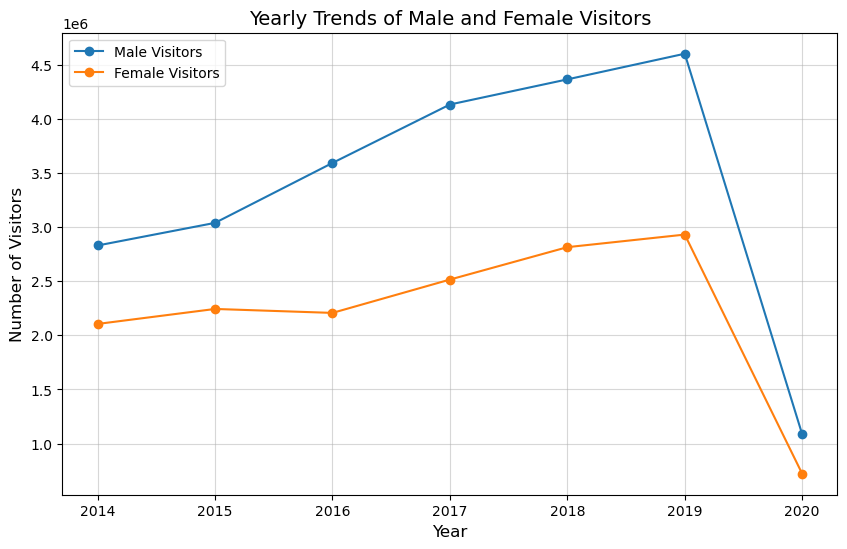

In [16]:

# Extract and sum male and female visitor counts by year
years = list(range(2014, 2021))
male_columns = [f"{year} Male Visitors" for year in years]
female_columns = [f"{year} Female Visitors" for year in years]

male_trends = cgen_final[male_columns].sum()
female_trends = cgen_final[female_columns].sum()

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(years, male_trends, label='Male Visitors', marker='o')
plt.plot(years, female_trends, label='Female Visitors', marker='o')
plt.title('Yearly Trends of Male and Female Visitors', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('yearly_trends.png') 
plt.show()

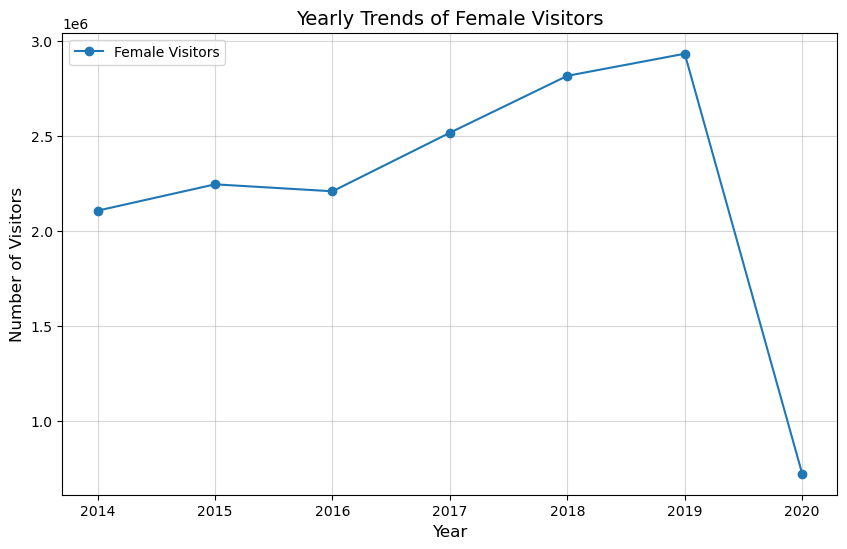

In [17]:
# Extract and sum male and female visitor counts by year
years = list(range(2014, 2021))
female_columns = [f"{year} Female Visitors" for year in years]
female_trends = cgen_final[female_columns].sum()

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(years, female_trends, label='Female Visitors', marker='o')
plt.title('Yearly Trends of Female Visitors', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('female_trends.png') 
plt.show()

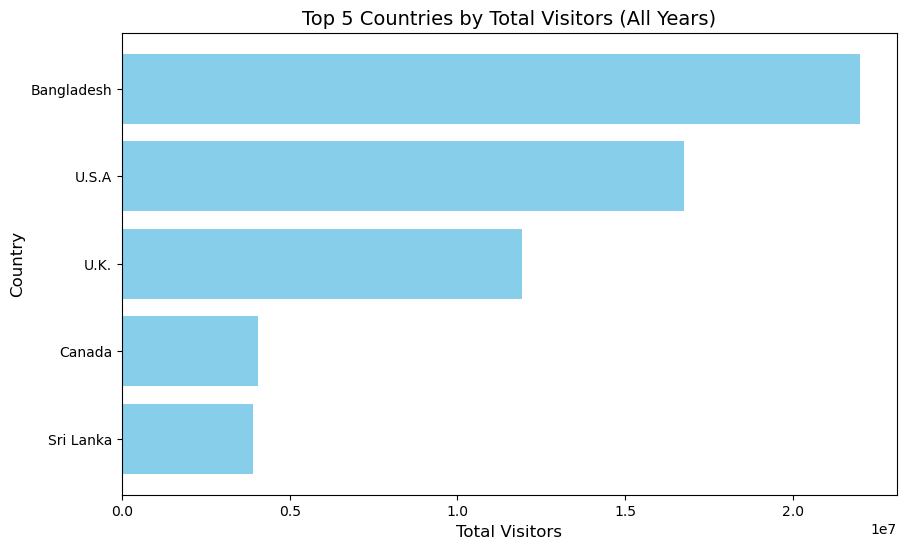

In [20]:


# Calculate total visitors for each country across all years
cyv['Total_Visitors'] = cyv.iloc[:, 1:].sum(axis=1)

# Sort by total visitors and select the top 5 countries
top_5_countries = cyv.sort_values(by='Total_Visitors', ascending=False).head(5)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country'], top_5_countries['Total_Visitors'], color='skyblue')
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 5 Countries by Total Visitors (All Years)', fontsize=14)
plt.gca().invert_yaxis() # Invert y-axis for better visual alignment
plt.savefig('TopCountries.png') 
plt.show()